In [6]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [2]:
dfVariant = pd.read_csv('covid-variants.csv')
dfVariant = dfVariant[(dfVariant['variant'] == 'Delta')]

# parse date, select range and indexing
dfVariant['date']= pd.to_datetime(dfVariant['date'])
dfVariant=dfVariant[(dfVariant['date']>'2021-1-1') & (dfVariant['date']<='2021-10-16')]
dfVariant.set_index(dfVariant['date'], inplace=True)

print(dfVariant.columns)

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')


In [3]:
df= pd.read_csv("owid-covid-data (1).csv")

# parse date, select range and indexing
df['date']= pd.to_datetime(df['date'])
df=df[(df['date']>'2021-1-1')&(df['date']<='2021-10-16')]
df.set_index(df['date'], inplace=True)

print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# below locations looks OK
location = ['Argentina', 'Austria', 'Brazil', 'Bulgaria', 'Cambodia', 'France', 'Germany', 'Ireland', 'Italy',
            'Japan', 'Kenya', 'Malaysia', 'Mexico', 'Netherlands', 'Nigeria', 'Poland', 'Portugal', 'South Africa',
            'Spain', 'United States']

# all unique locations
# location = df["location"].unique().tolist()


United States 
 (1375, 6)                  location       date variant  num_sequences  perc_sequences  \
date                                                                          
2021-01-25         Angola 2021-01-25   Delta            0.0            0.00   
2021-02-08         Angola 2021-02-08   Delta            0.0            0.00   
2021-02-22         Angola 2021-02-22   Delta            0.0            0.00   
2021-03-08         Angola 2021-03-08   Delta            0.0            0.00   
2021-03-22         Angola 2021-03-22   Delta            0.0            0.00   
2021-04-05         Angola 2021-04-05   Delta            0.0            0.00   
2021-04-19         Angola 2021-04-19   Delta            2.0            2.41   
2021-05-03         Angola 2021-05-03   Delta            1.0            2.94   
2021-06-28         Angola 2021-06-28   Delta           10.0           16.95   
2021-07-12         Angola 2021-07-12   Delta           23.0           50.00   
2021-01-04      Argentina 

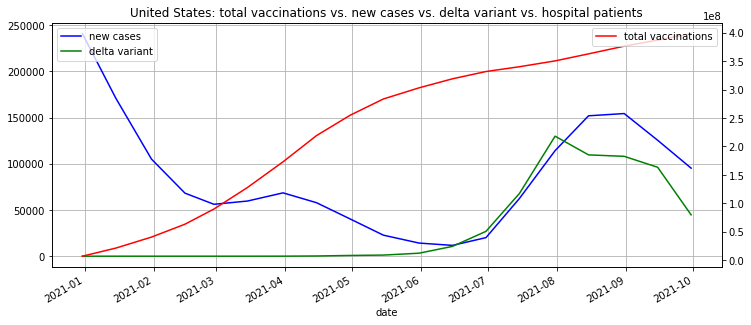

In [5]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    print(ctry, '\n', dfVariant.shape, dfVariant)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', df.shape, dfTemp['new_cases'], dfTemp['total_vaccinations'])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations vs. new cases vs. delta variant vs. hospital patients')
    ax1 = dfTemp.new_cases.plot(color='blue', grid=True, label='new cases')
    ax2 = dfTemp.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total vaccinations')
    ax3 = dfVariTemp.num_sequences.plot(color='green', grid=True, label='delta variant')

    # print(f"{ctry} total_vac vs new cases:")
    # print(dfTemp.total_vaccinations.corr(dfTemp.new_cases))
    #
    # print(f"{ctry} total_vac vs delta cases:")
    # print(dfTemp.total_vaccinations.iloc[10:].corr(dfVariTemp.num_sequences.iloc[10:]))
    #
    # print(f"{ctry} new cases vs delta cases:")
    # print(dfTemp.new_cases.iloc[10:].corr(dfVariTemp.num_sequences.iloc[10:]))

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()


    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=2)


    plt.show()

United States 
 (1375, 6) 
             num_sequences  perc_sequences  num_sequences_total
date                                                          
2020-12-31            2.0            0.01                19010
2021-01-15            2.0            0.01                35942
2021-01-31            3.0            0.01                33704
2021-02-15            3.0            0.01                34731
2021-02-28            2.0            0.01                38441
2021-03-15            5.0            0.01                51412
2021-03-31           36.0            0.05                67764
2021-04-15          234.0            0.30                79295
2021-04-30          801.0            1.19                67030
2021-05-15         1217.0            2.42                50366
2021-05-31         3246.0           15.04                23875
2021-06-15        10640.0           51.20                20782
2021-06-30        26897.0           79.67                33760
2021-07-15        67884.0  

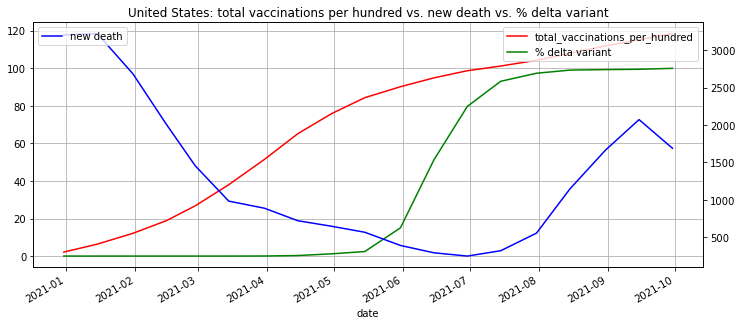

In [440]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    print(ctry, '\n', df.shape, '\n', dfTemp[['new_deaths', 'new_deaths_per_million', 'new_deaths_per_million',
                                              'total_vaccinations', 'total_vaccinations_per_hundred']])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations per hundred vs. new death vs. % delta variant')
    ax1 = dfTemp.new_deaths.plot(color='blue', grid=True, secondary_y=True, label='new death')
    ax2 = dfTemp.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax3 = dfVariTemp.perc_sequences.plot(color='green', grid=True, label='% delta variant')
    # ax4 = dfTemp.icu_patients.plot(color='purple', grid=True, label='icu patients')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    # h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=1)
    # ax4.legend(loc=2)

    plt.show()

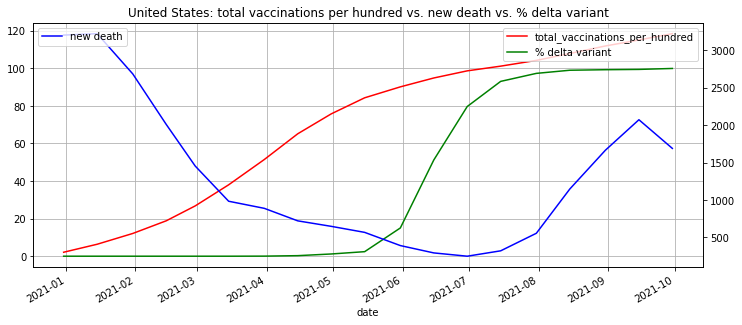

In [9]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
   # print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    #print(ctry, '\n', df.shape, '\n', dfTemp[['new_deaths', 'new_deaths_per_million', 'new_deaths_per_million',
                                           #   'total_vaccinations', 'total_vaccinations_per_hundred']])

    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations per hundred vs. new death vs. % delta variant')
    ax1 = dfTemp.new_deaths.plot(color='blue', grid=True, secondary_y=True, label='new death')
    ax2 = dfTemp.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax3 = dfVariTemp.perc_sequences.plot(color='green', grid=True, label='% delta variant')
    # ax4 = dfTemp.icu_patients.plot(color='purple', grid=True, label='icu patients')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    # h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=1)
    # ax4.legend(loc=2)

    plt.show()

            num_sequences  perc_sequences  num_sequences_total
date                                                          
2020-12-31            2.0            0.01                19010
2021-01-15            2.0            0.01                35942
2021-01-31            3.0            0.01                33704
2021-02-15            3.0            0.01                34731
2021-02-28            2.0            0.01                38441
2021-03-15            5.0            0.01                51412
2021-03-31           36.0            0.05                67764
2021-04-15          234.0            0.30                79295
2021-04-30          801.0            1.19                67030
2021-05-15         1217.0            2.42                50366
2021-05-31         3246.0           15.04                23875
2021-06-15        10640.0           51.20                20782
2021-06-30        26897.0           79.67                33760
2021-07-15        67884.0           93.05              

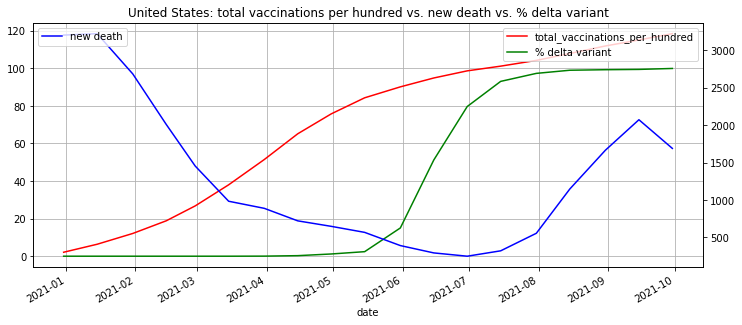

In [12]:
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
   # print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    #print(ctry, '\n', df.shape, '\n', dfTemp[['new_deaths', 'new_deaths_per_million', 'new_deaths_per_million',
                                           #   'total_vaccinations', 'total_vaccinations_per_hundred']])
    print(dfVariTemp)
    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: total vaccinations per hundred vs. new death vs. % delta variant')
    ax1 = dfTemp.new_deaths.plot(color='blue', grid=True, secondary_y=True, label='new death')
    ax2 = dfTemp.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax3 = dfVariTemp.perc_sequences.plot(color='green', grid=True, label='% delta variant')
    # ax4 = dfTemp.icu_patients.plot(color='purple', grid=True, label='icu patients')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    # h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax3.legend(loc=1)
    # ax4.legend(loc=2)

    plt.show()

(19, 3)
(19, 60)
(19, 63)
            num_sequences  perc_sequences  num_sequences_total  total_cases  \
date                                                                          
2020-12-31       0.000000        0.000000             0.000000     0.000000   
2021-01-15       0.000000        0.000000             0.147864     0.134234   
2021-01-31       0.000008        0.000000             0.128320     0.229610   
2021-02-15       0.000008        0.000000             0.137288     0.281276   
2021-02-28       0.000000        0.000000             0.169687     0.321335   
2021-03-15       0.000023        0.000000             0.282960     0.361039   
2021-03-31       0.000262        0.000400             0.425758     0.406534   
2021-04-15       0.001786        0.002902             0.526456     0.450756   
2021-04-30       0.006150        0.011809             0.419348     0.483467   
2021-05-15       0.009352        0.024119             0.273825     0.505062   
2021-05-31       0.024969 

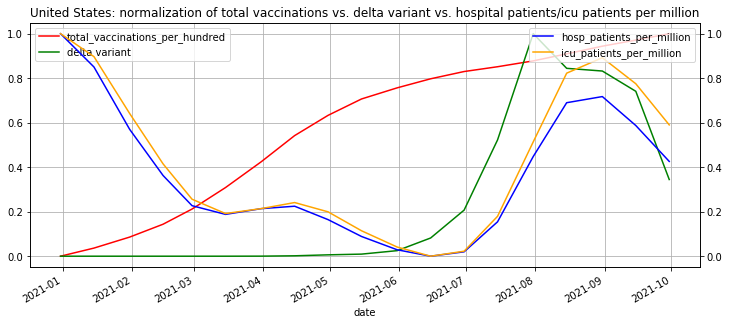

In [22]:
#normalization data
location = ['United States']

for ctry in location:

    # resample to biweekly
    dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', dfVariant.shape,'\n', dfVariTemp)

    dfTemp = df[df['location'] == ctry].resample('sm').mean()
    # print(ctry, '\n', df.shape, '\n', dfTemp[['icu_patients_per_million', 'weekly_icu_admissions','weekly_icu_admissions_per_million',
    #                                           'hosp_patients_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million',
    #                                           'hosp_patients', 'hospital_beds_per_thousand',
    #                                           'total_vaccinations', 'total_vaccinations_per_hundred']])
    print(dfVariTemp.shape)
    print(dfTemp.shape)
    dfmerge = dfVariTemp.join(dfTemp) 
    print(dfmerge.shape)
    dfnorm =(dfmerge-dfmerge.min())/(dfmerge.max()-dfmerge.min())
    print(dfnorm)
    plt.figure(figsize=(12,5))
    plt.title(f'{ctry}: normalization of total vaccinations vs. delta variant vs. hospital patients/icu patients per million')
    ax1 = dfnorm.total_vaccinations_per_hundred.plot(color='red', grid=True, label='total_vaccinations_per_hundred')
    ax2 = dfnorm.num_sequences.plot(color='green', grid=True, label='delta variant')
    ax3 = dfnorm.hosp_patients_per_million  .plot(color='blue', grid=True,secondary_y=True, label='hosp_patients_per_million')
    ax4 = dfnorm.icu_patients_per_million.plot(color='orange', grid=True, secondary_y=True, label='icu_patients_per_million')


    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    h3, l3 = ax3.get_legend_handles_labels()
    h4, l4 = ax3.get_legend_handles_labels()

    #plt.legend(h1+h2, l1+l2, loc=2)
    ax1.legend(loc=2)
    ax2.legend(loc=2)
    ax3.legend(loc=1)
    ax4.legend(loc=1)

    plt.show()


In [442]:
from statsmodels.tsa.stattools import adfuller

def pt_result(input):
    if input > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

def pt_details(result):
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'critical_values: {result[4]}')

In [448]:
location = ['United States']
col_names1 =['total_vaccinations', 'new_cases', 'new_deaths']
col_names2 = ['hosp_patients', 'icu_patients']

for ctry in location:
    # dfVariTemp = dfVariant[dfVariant['location'] == ctry].resample('sm').mean()

    for col in col_names1:
        dfTemp = df[df['location'] == ctry]
        dfTemp = dfTemp.resample('10D', on='date').mean().reset_index().ffill()
        print('\n', dfTemp.shape, '10D')
        # print('\n', dfTemp.head)
        print(col + " stationary test (ADF test):")
        result = adfuller(dfTemp[col])
        # pt_details(result)
        pt_result(result[1])

    for col in col_names2:
        dfTemp = df[df['location'] == ctry]
        dfTemp = dfTemp.resample('18D', on='date').mean().reset_index().ffill()
        print('\n', dfTemp.shape)
        # print('\n', dfTemp.head)
        print(col + " stationary test (ADF test):")
        result = adfuller(dfTemp[col])
        # pt_details(result)
        pt_result(result[1])



 (29, 61) 10D
total_vaccinations stationary test (ADF test):
Series is stationary

 (29, 61) 10D
new_cases stationary test (ADF test):
Series is stationary

 (29, 61) 10D
new_deaths stationary test (ADF test):
Series is stationary

 (16, 61)
hosp_patients stationary test (ADF test):
Series is stationary

 (16, 61)
icu_patients stationary test (ADF test):
Series is stationary


In [30]:
from statsmodels.tsa.stattools import grangercausalitytests

tup_ls1 = [ ('new_cases', 'total_vaccinations'),
            ( 'total_vaccinations','new_cases'),
           ]


tup_ls2 = [ ('new_deaths', 'total_vaccinations'),
            ( 'total_vaccinations','new_deaths'),
           ]

tup_ls3 = [ ('hosp_patients', 'total_vaccinations'),
           ( 'total_vaccinations','hosp_patients') ]

tup_ls4 = [ ('icu_patients', 'total_vaccinations'),
           ('total_vaccinations','icu_patients') ]



for ctry in location:
    for tup in tup_ls4:
        print( '\n', ctry, tup)
        dfTemp = df[df['location'] == ctry]
        dfTemp = dfTemp.resample('10D', on='date').mean().ffill()
        # print('\n', dfTemp.head)
        grangercausalitytests(dfTemp[[tup[0], tup[1]]], maxlag=4)
      



 United States ('icu_patients', 'total_vaccinations')

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0661  , p=0.0135  , df_denom=25, df_num=1
ssr based chi2 test:   chi2=7.9140  , p=0.0049  , df=1
likelihood ratio test: chi2=6.9699  , p=0.0083  , df=1
parameter F test:         F=7.0661  , p=0.0135  , df_denom=25, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8723  , p=0.1775  , df_denom=22, df_num=2
ssr based chi2 test:   chi2=4.5957  , p=0.1005  , df=2
likelihood ratio test: chi2=4.2440  , p=0.1198  , df=2
parameter F test:         F=1.8723  , p=0.1775  , df_denom=22, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6299  , p=0.0318  , df_denom=19, df_num=3
ssr based chi2 test:   chi2=14.9015 , p=0.0019  , df=3
likelihood ratio test: chi2=11.7798 , p=0.0082  , df=3
parameter F test:         F=3.6299  , p=0.0318  , df_denom=19, df_num=3

Granger Causality
number of lags (no zero) 4